# Feature (Conformational) Selection

In [1]:
import pandas as pd
import numpy as np
import glob, os, sys
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='notebook', style = 'whitegrid', font_scale = 1.3)

In [2]:
sys.path.append('..')
from modules.plotting_metrics import PlotMetric

In [209]:
# Helper function
%run ./helper_functions_S6.ipynb

### Load the data:

In [210]:
# Dictionary of docking results
# notebook helper_functions does the trick
scores_dic = get_docking_scores_dict()

In [517]:
df_test = scores_dic['CSAR']['Dk_sc']['X']
activity = scores_dic['CSAR']['Dk_sc']['y']
df_test['Activity'] = activity
df_test['key'] = df_test.index
df_test['key'] = df_test['key'].str.split('(\d+)').str[1].astype(int)
df_test['key']

df_test.sort_values(by = ['Activity', 'key'], ascending = True, inplace = True)
df_test = df_test.drop(['key'], axis = 1)

In [533]:
df_active_pos = pd.DataFrame()

for column in df_test.iloc[:, :-1]:
    actives_rank = df_test[['Activity', column]].sort_values(by = column)['Activity'].to_numpy()
    df_active_pos[column] = actives_rank
    
df_active_pos.head()

,1aq1,1b38,1b39,1buh,1ckp,1di8,1dm2,1e1v,1e1x,1e9h,...,6q4b,6q4c,6q4d,6q4e,6q4f,6q4g,6q4h,6q4i,6q4j,6q4k
0,0,0,1,1,1,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
1,1,1,0,0,1,1,1,1,1,1,...,0,0,0,1,0,0,0,0,0,1
2,1,0,1,1,1,0,0,0,0,0,...,1,0,0,1,1,0,1,0,0,1
3,1,0,1,0,1,0,1,0,0,0,...,0,1,1,1,0,0,0,0,0,0
4,0,0,1,0,1,1,1,1,0,1,...,1,0,1,1,1,0,0,1,1,0


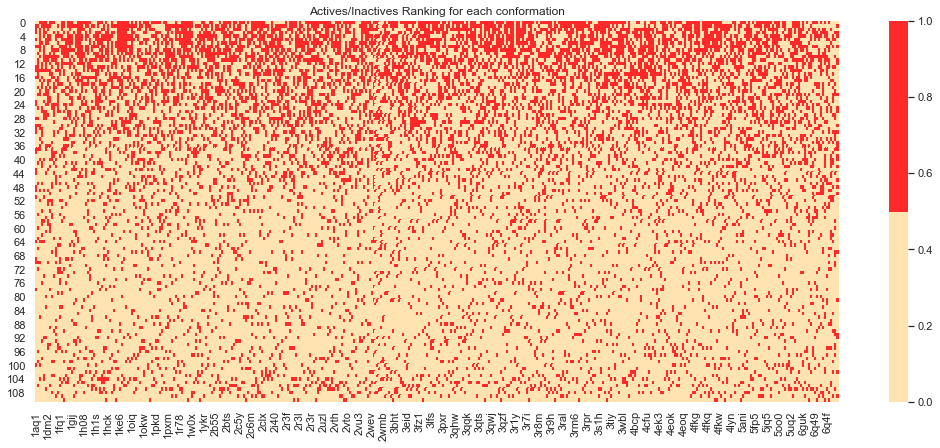

In [532]:
# Plot the correlation matrix using Kendall's Tau and Spearman's Rank Correlations Coef.
sns.set(font_scale=1)
fig, ax1 = plt.subplots(figsize=(18, 7))
sns.heatmap(df_active_pos, vmin = 0, vmax = 1, cmap = ['#FFE4B1','#FF2929'], ax= ax1)\
                        .set_title('Actives/Inactives Ranking for each conformation')
plt.show()

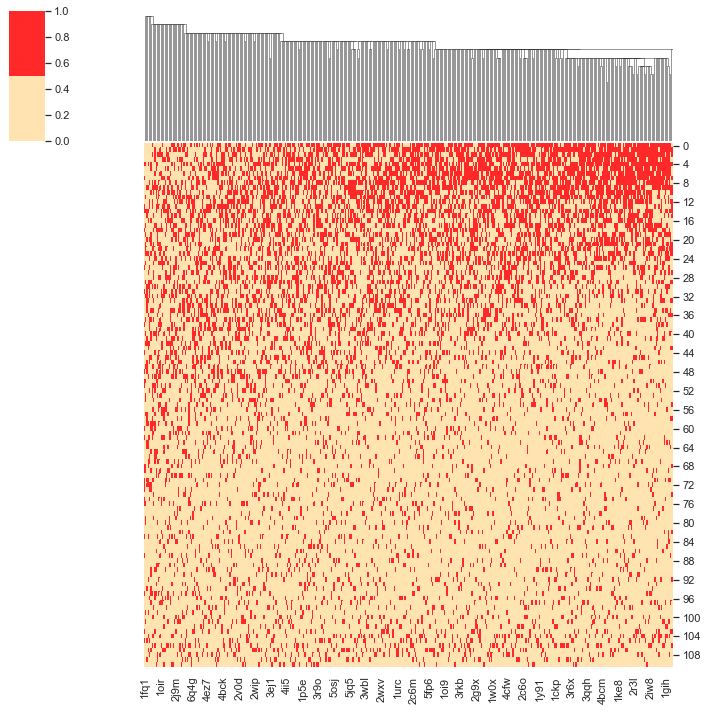

In [531]:
sns.set(font_scale=1)
sns.clustermap(df_ranked, cmap =['#FFE4B1','#FF2929'], 
               col_cluster = True, row_cluster = False,
               metric = 'correlation', method = 'single');

In [535]:
df_rankings = df_test.iloc[:,:-1].rank(axis = 0)
df_rankings

,1aq1,1b38,1b39,1buh,1ckp,1di8,1dm2,1e1v,1e1x,1e9h,...,6q4b,6q4c,6q4d,6q4e,6q4f,6q4g,6q4h,6q4i,6q4j,6q4k
Ligando,,,,,,,,,,,,,,,,,,,,,
CS5,81.5,76.5,82.5,96.5,45.0,79.5,97.0,72.5,88.0,87.0,...,71.0,67.5,63.5,90.0,87.5,75.5,69.0,93.0,77.5,73.5
CS27,99.0,89.5,82.5,85.5,103.0,85.5,80.0,91.5,84.5,96.5,...,94.0,94.0,98.5,81.5,100.0,98.5,95.0,77.0,88.0,101.0
CS29,1.0,57.0,69.5,40.0,19.5,31.0,17.0,27.0,18.5,7.0,...,15.0,40.0,33.0,54.0,27.5,31.5,25.0,73.5,45.0,25.5
CS31,21.0,19.0,12.5,2.0,16.5,22.5,31.0,27.0,36.5,50.5,...,26.5,20.5,21.5,28.5,40.5,25.5,14.0,37.5,19.0,18.5
CS32,19.0,30.5,24.5,53.5,72.0,79.5,31.0,27.0,48.0,68.0,...,33.0,40.0,28.5,28.5,32.5,65.0,59.0,16.5,37.5,54.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CS247,2.0,2.0,3.0,2.0,1.0,2.0,5.5,2.0,8.0,4.0,...,5.5,5.0,4.0,4.0,6.0,1.0,8.5,8.0,11.0,4.0
CS248,31.0,30.5,19.0,32.5,5.5,25.0,23.0,20.5,54.0,17.5,...,46.5,32.5,21.5,28.5,22.5,31.5,51.5,25.0,72.5,36.0
CS260,46.5,20.0,14.5,17.0,11.0,7.5,27.0,11.5,13.5,39.0,...,12.0,12.0,21.5,5.0,27.5,12.0,25.0,22.5,37.5,4.0


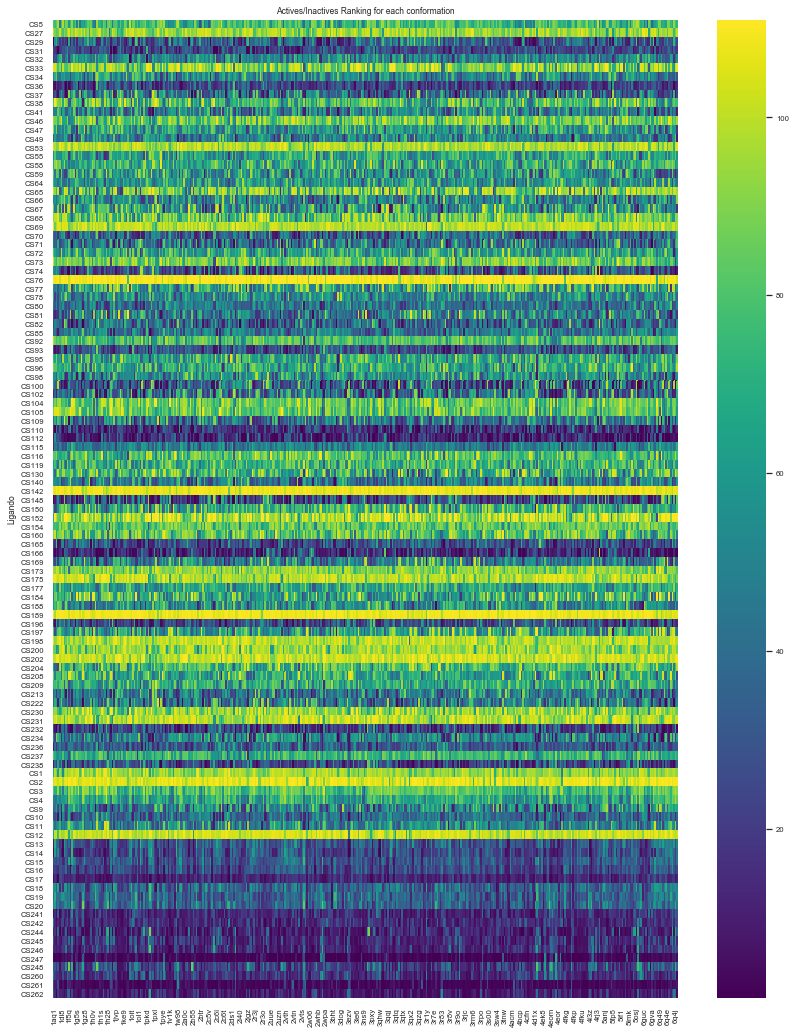

In [529]:
sns.set(font_scale=0.7)
fig, ax1 = plt.subplots(figsize=(14, 18))
sns.heatmap(df_rankings, 
            cmap = 'viridis', ax= ax1)\
            .set_title('Actives/Inactives Ranking for each conformation')
plt.show()

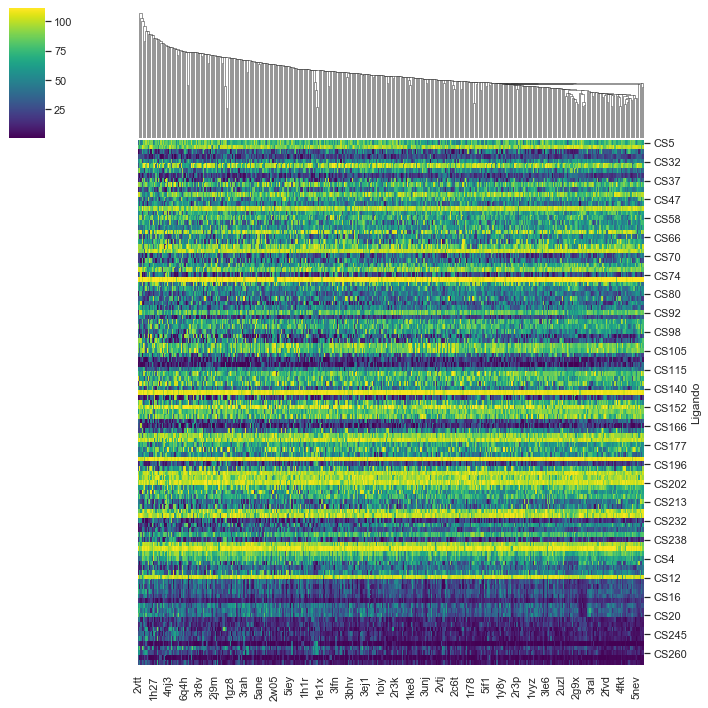

In [542]:
sns.set(font_scale=1)
sns.clustermap(df_rankings, cmap = 'viridis', 
               col_cluster = True, row_cluster = False,
               metric = 'correlation', method = 'single');

In [554]:
### Example

array([111, 110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100,  99,
        98,  97,  96,  95,  94,  93,  92,  91,  90,  89,  88,  87,  86,
        85,  84,  83,  82,  81,  80,  79,  78,  77,  76,  75,  74,  73,
        72,  71,  70,  69,  68,  67,  66,  65,  64,  63,  62,  61,  60,
        59,  58,  57,  56,  55,  54,  53,  52,  51,  50,  49,  48,  47,
        46,  45,  44,  43,  42,  41,  40,  39,  38,  37,  36,  35,  34,
        33,  32,  31,  30,  29,  28,  27,  26,  25,  24,  23,  22,  21,
        20,  19,  18,  17,  16,  15,  14,  13,  12,  11,  10,   9,   8,
         7,   6,   5,   4,   3,   2,   1])

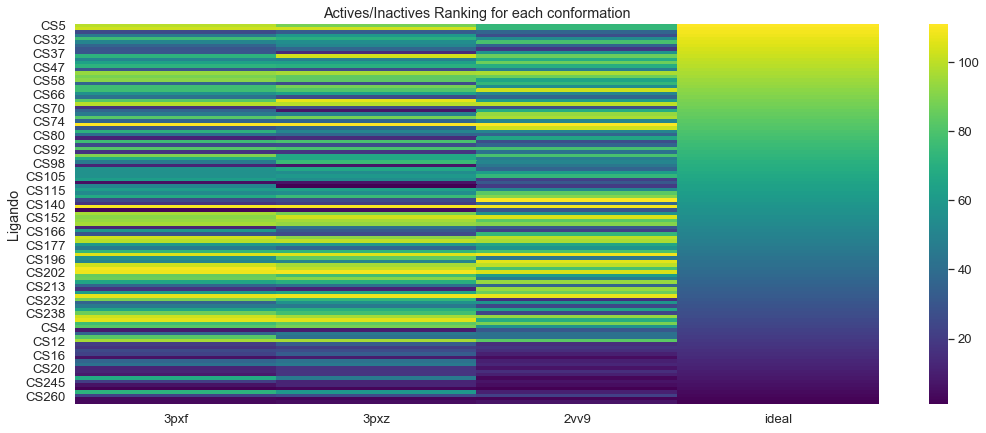

,3pxf,3pxz,2vv9,ideal
3pxf,1.000000,0.930888,0.630753,0.192161
3pxz,0.930888,1.000000,0.644127,0.200606
2vv9,0.630753,0.644127,1.000000,0.376186
ideal,0.192161,0.200606,0.376186,1.000000


In [556]:
# Plot the correlation matrix using Kendall's Tau and Spearman's Rank Correlations Coef.
sns.set(font_scale=1.2)
fig, ax1 = plt.subplots(figsize=(18, 7))

df_example = df_rankings[['3pxf', '3pxz', '2vv9']].copy()
df_example['ideal'] = np.arange(111, 0, -1)                      

sns.heatmap(df_example, cmap = 'viridis', ax= ax1)\
            .set_title('Actives/Inactives Ranking for each conformation')
plt.show()

df_example.corr()

In [169]:
# Get the correlation matrix
# Pearson 
corr_pear = df_test.corr()
# Spearman 
corr_spear = df_test.corr(method = 'spearman')

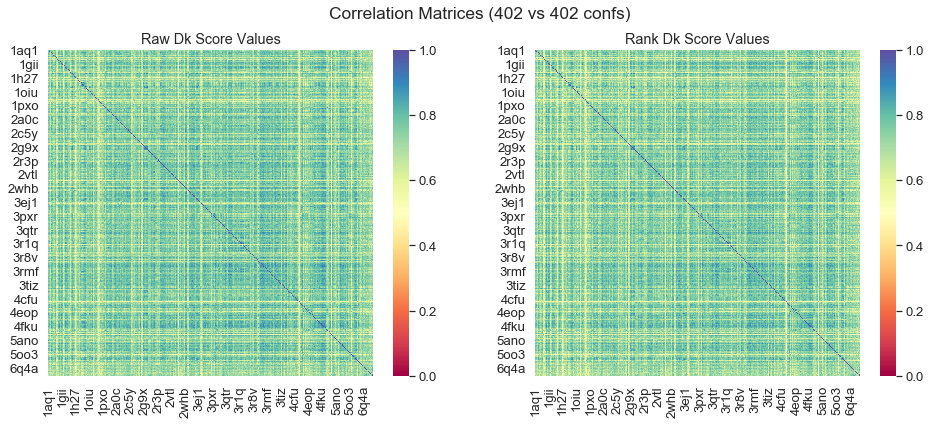

In [559]:
# Plot the correlation matrix using Kendall's Tau and Spearman's Rank Correlations Coef.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
sns.heatmap(corr_pear, vmin = 0, vmax = 1, cmap = 'Spectral', ax= ax1)\
                                        .set_title('Raw Dk Score Values')
sns.heatmap(corr_spear, vmin = 0, vmax = 1, cmap = 'Spectral', ax= ax2)\
                                        .set_title('Rank Dk Score Values')
fig.suptitle('Correlation Matrices (402 vs 402 confs)')
plt.show()

In [46]:
# We are going to keep the spearman correaltion matrix usin the ranked values

In [47]:
# Next step, clustering using ward hierarchical clustring

In [560]:
def correlation(dataset, threshold):
    # Creates a dictionary with feature names and a counter initialized at zero
    counter_of_corrs = {f: 0 for f in dataset.columns}
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr(method='spearman')
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold):
                colname_i = corr_matrix.columns[i] # getting the name of column i
                colname_j = corr_matrix.columns[j] # getting the name of column j
                counter_of_corrs[colname_i] += 1
                counter_of_corrs[colname_j] += 1
    # Trasnform the result to a series
    counter_of_corrs = pd.Series(counter_of_corrs)
    return(counter_of_corrs)

def drop_features(dataset, thr, min_thr, step, list_of_droped_features):
    counter_of_corrs = correlation(dataset, thr)
    max_n_correlations = counter_of_corrs.max()
    if max_n_correlations > 0:
        # Get the features with the max value
        features = counter_of_corrs[counter_of_corrs == max_n_correlations]
        features_names = [i for i in features.index]
        print(features_names)
        # Drop one feature ramdomly
        feature_to_drop = np.random.choice(features_names)
        list_of_droped_features.append(feature_to_drop)
        print(feature_to_drop, '->', round(thr, 3))
        new_dataset = dataset.drop([feature_to_drop], axis = 1)
        # Recursively
        drop_features(new_dataset, thr, min_thr, step, list_of_droped_features)
    elif thr >= min_thr:
        #print(thr, min_thr)
        drop_features(dataset, thr - step, min_thr, step, list_of_droped_features)

def features_to_drop(dataset, min_thr, max_thr, step):
    dataset = dataset.copy()
    list_of_droped_features = []
    # User recursion to find
    drop_features(dataset, max_thr, min_thr, step, list_of_droped_features)
    
    return(list_of_droped_features)

In [562]:
features_to_drop(df_rankings, min_thr = 0.9, max_thr = 1, step =  0.01)

['3pxf', '3pxz']
3pxz -> 0.93
['2g9x', '2iw9', '2xnb', '3qtz', '3rjc', '3rk5', '3rk7', '3rpv', '3s0o', '3sw4', '3sw7', '4ek8', '4eoi', '4eop']
2xnb -> 0.92
['2g9x', '2iw9', '3qtz', '3rjc', '3rk5', '3rk7', '3rpv', '3s0o', '3sw4', '3sw7', '4eoi', '4eop']
3rjc -> 0.92
['2g9x', '2iw9', '3qtz', '3rk5', '3rk7', '3rpv', '3sw4', '3sw7', '4eoi', '4eop']
3qtz -> 0.92
['2g9x', '2iw9', '3rk5', '3rk7', '3sw4', '3sw7', '4eoi', '4eop']
2g9x -> 0.92
['3rk5', '3rk7', '3sw4', '3sw7', '4eoi', '4eop']
3sw7 -> 0.92
['3rk5', '3rk7', '4eoi', '4eop']
4eoi -> 0.92
['3rk5', '3rk7']
3rk5 -> 0.92
['1oi9', '2fvd', '2iw9', '3py0', '3qtx', '3r1q', '3r28', '4acm', '4fkv', '5iev']
2iw9 -> 0.91
['2fvd', '3py0', '3qtx', '3r1q', '3r28', '4acm', '4fkv', '5iev']
4acm -> 0.91
['2fvd', '3qtx', '3r1q', '3r28', '4fkv', '5iev']
2fvd -> 0.91
['3qtx', '3r1q', '3r28', '5iev']
3qtx -> 0.91
['3r1q', '3r28']
3r28 -> 0.91
['4fks']
4fks -> 0.9
['3rpv', '4fku']
3rpv -> 0.9
['4fku']
4fku -> 0.9
['1h1s', '1oi9', '1oiu', '2iw8', '3py0', '3

['3pxz',
 '2xnb',
 '3rjc',
 '3qtz',
 '2g9x',
 '3sw7',
 '4eoi',
 '3rk5',
 '2iw9',
 '4acm',
 '2fvd',
 '3qtx',
 '3r28',
 '4fks',
 '3rpv',
 '4fku',
 '5nev',
 '1oi9',
 '3qtq',
 '3rmf',
 '3r1s',
 '3py0',
 '2iw8']

'3rk7'

In [50]:
from sklearn.cluster import AgglomerativeClustering

In [181]:
hc_corr = AgglomerativeClustering(n_clusters = 3, 
                                  #distance_threshold = 0,
                                  linkage = 'complete')
hc_corr.fit(corr_kendall)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=3)

In [182]:
# Get the labels of a ginven cutoff
k3_labels = hc_corr.labels_

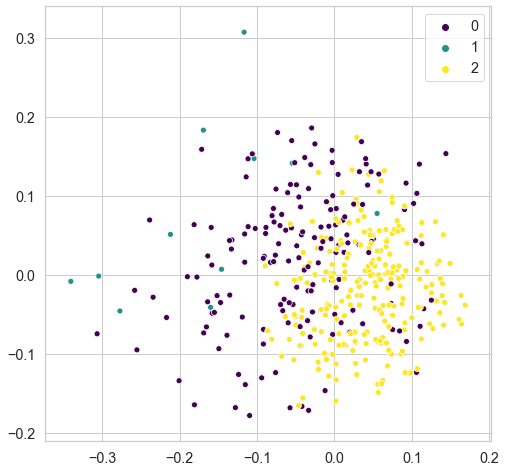

In [183]:
# Convert to a distance matrix
from modules.MDS import cMDS

dist_corr = 1 - corr_kendall

mds_corr = cMDS(dist_corr)

# Plt the cMDS
fig = plt.figure(figsize = (8,8))
sns.scatterplot(x = mds_corr[0][0], y = mds_corr[0][1], hue= k3_labels, palette = 'viridis')

array([0.7413475 , 0.02146025])

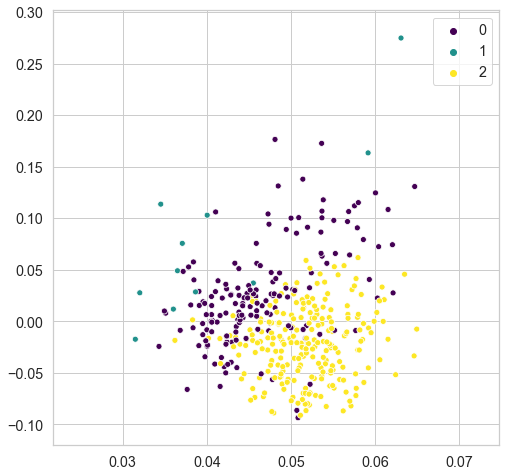

In [185]:
# Performing a PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(PCA(n_components=2))

pipe.fit_transform(df_test)
# Plot
fig = plt.figure(figsize = (8,8))
sns.scatterplot(x = pipe['pca'].components_[0], y = pipe['pca'].components_[1], 
                hue= k3_labels, palette = 'viridis')

pipe['pca'].explained_variance_ratio_

In [ ]:
# Tanimo to coeficient / jaccard
import scipy

scipy.spatial.distance.jaccard(df_test['1aq1'], df_test['1aq1'])

In [172]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

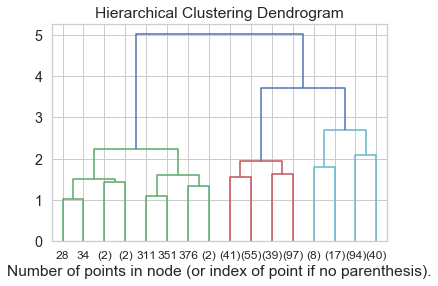

In [173]:
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(hc_corr, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()